## Importing dirs and installing module

Parent directory containing .py and .ipynb files

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
print('The working directory is parentdir: %s' %parentdir)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
download = r'/home/biswajit/Downloads'

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis


Directories containing data files

In [10]:
folder_power_S106 = r'/home/biswajit/Links/Link to AzurinSM-MS4/data/S106d17May17_CuAzu655_powerdependent';
folder_power_S105 = r'/home/biswajit/Links/Link to AzurinSM-MS4/data/S105d16May17_635_A3_CuAzu655_powerdependent';
laser_power_file='/home/biswajit/Links/Link to AzurinSM-MS4/data/power_measurement.xlsx'
folder_Zn_power_S107='/home/biswajit/Links/Link to AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_power';

In [2]:
#Run this once to run the .py(Analysis_bis.py) file.
os.chdir(parentdir)
# !python Analysis_bis.py
%run Analysis.py

In [3]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "10"

## Power vs percentage

In [4]:
laser_power_file='/home/biswajit/Links/Link to AzurinSM-MS4/data/power_measurement.xlsx'
df_laser_power = pd.read_excel(laser_power_file, header=1);
df_laser_power = df_laser_power[[0,1]]
df_laser_power.columns = ['percentage', 'uw']
df_laser_power[10:20]

,percentage,uw
10,65.0,3.86
11,64.5,3.00
12,64.0,2.18
13,63.5,1.46
14,63.0,0.76
15,62.5,0.39
16,62.0,0.22
17,61.5,0.16
18,61.0,0.13
19,60.5,0.10


## Power extract

In [5]:
def power_from_filename(filename, string_id='10s'):
    pos_power = filename.find(string_id)
    pos_2 = filename[pos_power-2];
    pos_3 = filename[pos_power-3];
    pos_4 = filename[pos_power-4];
    pos_5 = filename[pos_power-5];
    pos_6 = filename[pos_power-6];
    pos_7 = filename[pos_power-7];
    power = []
    if pos_3 in ['_']:
        power = pos_2
    elif pos_4 in ['_']:
        power = pos_3+pos_2
    elif pos_5 in ['_']:
        power = pos_4 + pos_3 + pos_2
    elif pos_6 in ['_']:
        power = pos_5 + pos_4 + pos_3 + pos_2
    elif pos_7 in ['_']:
        power = pos_6 + pos_5 + pos_4 + pos_3 + pos_2
    return power
def power_extract(foldername=folder_power_S105, laser_power_file=laser_power_file, string_id = '10s'):
    df_datn_emplot, df_FCS, pt3_folder = dir_mV_molNo(foldername);
    df_datn_emplot.reset_index(drop=True, inplace=True);
    df_FCS.reset_index(drop=True, inplace=True);
    df_laser_power = pd.read_excel(laser_power_file, header=1);
    df_laser_power = df_laser_power[[0,1]]
    df_laser_power.columns = ['percentage', 'uw']
    #----------datn_emplot---------------
    power_list_datnem = []; real_power_datnem_list = [];
    for i in range(len(df_datn_emplot)):
        filename = df_datn_emplot['filename[.datn]'][i]
        power_datn_em = power_from_filename(filename=filename, string_id=string_id);
        power_datn_em = float(power_datn_em)
        real_power = df_laser_power[df_laser_power['percentage'].isin([power_datn_em])];
        real_power.reset_index(drop=True, inplace=True);
        real_power = real_power['uw'][0]
        
        power_list_datnem = append(power_list_datnem, power_datn_em);
        real_power_datnem_list = append(real_power_datnem_list, real_power)
        
    power_list_datnem = pd.DataFrame(power_list_datnem, columns=['percentage'])
    real_power_datnem_list = pd.DataFrame(real_power_datnem_list, columns=['real_power'])
    df_datnem_power_list = pd.concat([df_datn_emplot, power_list_datnem, real_power_datnem_list], axis=1)
    #--------------FCS-------------
    power_list_fcs = []; real_power_fcs_list=[];
    for i in range(len(df_FCS)):
        filename = df_FCS['filename[FCS]'][i]
        power_fcs = power_from_filename(filename=filename, string_id=string_id);
        power_fcs = float(power_fcs);
        real_power = df_laser_power[df_laser_power['percentage'].isin([power_fcs])];
        real_power.reset_index(drop=True, inplace=True);
        real_power = real_power['uw'][0]
        power_list_fcs = append(power_list_fcs, power_fcs);
        real_power_fcs_list = append(real_power_fcs_list, real_power)
    power_list_fcs = pd.DataFrame(real_power_fcs_list, columns=['percentage'])
    real_power_fcs_list = pd.DataFrame(real_power_fcs_list, columns=['real_power'])
    df_fcs_power_list = pd.concat([df_FCS, power_list_fcs, real_power_fcs_list], axis=1) 
    return df_datnem_power_list, df_fcs_power_list
df_datnem_power_list, df_fcs_power_list = power_extract();

## on-off times Vs Power

,power,average_ton,average_toff,average_ton_err,average_toff_err
0,0.01,71.77,969.99,191.36,4315.16
1,0.10,33.00,577.62,42.56,834.00
2,0.10,15.60,559.86,18.32,722.02
3,0.22,8.69,220.81,5.70,149.16
4,0.76,6.43,48.00,3.44,26.20


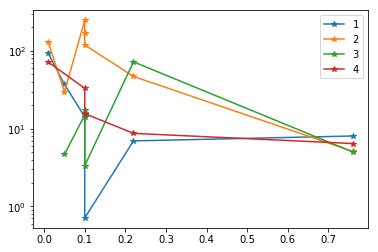

In [6]:
folder_power_S106 = r'/home/biswajit/Links/Link to AzurinSM-MS4/data/S106d17May17_CuAzu655_powerdependent';
folder_power_S105 = r'/home/biswajit/Links/Link to AzurinSM-MS4/data/S105d16May17_635_A3_CuAzu655_powerdependent';
laser_power_file='/home/biswajit/Links/Link to AzurinSM-MS4/data/power_measurement.xlsx'
def on_off_vs_power(foldername=folder_power_S105, input_potential=[75], pointnumbers=[1,2,3,4]):
    df_datnem_power_list, df_FCS = power_extract(foldername=foldername, laser_power_file=laser_power_file, string_id = '10s');
    df_em = df_datnem_power_list[df_datnem_power_list['Point number'].isin(pointnumbers)] 
    df_em = df_em[df_em['Potential'].isin(input_potential)]
    df_em.reset_index(drop=True, inplace=True)
    for points in pointnumbers:
        df_em_specific = df_em[df_em['Point number'].isin([points])]
        df_em_specific.reset_index(drop=True, inplace=True)
        cols = ['power', 'average_ton', 'average_toff', 'average_ton_err', 'average_toff_err']
        df_powerdep_out = pd.DataFrame(columns=cols)
        for j in range(len(df_em_specific)):
            f_emplot = df_em_specific['filepath[.em.plot]'][j]
            if os.path.isfile(f_emplot):
                x=0
                power = df_em_specific['real_power'][j]
                df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(f_emplot=f_emplot)
                df_powerdep_temp = pd.DataFrame([[power, average_ton, average_toff, average_ton_err, average_toff_err]], columns=cols)
                df_powerdep_out = df_powerdep_out.append(df_powerdep_temp)
        df_powerdep_out=df_powerdep_out.sort(['power'], ascending=True)
        df_powerdep_out.reset_index(drop=True, inplace=True)
        plot(df_powerdep_out['power'], df_powerdep_out['average_ton'], '-*', label=points)
        yscale('log')
        legend()
    return df_powerdep_out
fol = on_off_vs_power()
fol

## FCS-power dependent

### functions

In [20]:
def fcs_power(foldername=folder_power_S105, input_potential=[75], pointnumbers=range(20),
             power_list = [0.1, 0.22, 0.76],tmin=0.5e-3, tmax=1e3, string_id='10s'):
    df_datnem_power_list, df_fcs_power_list = power_extract(foldername=foldername, laser_power_file=laser_power_file, string_id = string_id);
    FCS_list = df_fcs_power_list
    FCS_list = FCS_list[FCS_list['Potential'].isin(input_potential)]
    FCS_list = FCS_list[FCS_list['real_power'].isin(power_list)]
    fig=[]; df_fcs=[];
    for points in pointnumbers:
        fig = plt.figure()
        df_fcs_specific = FCS_list[FCS_list['Point number'].isin([points])]
        df_fcs_specific.reset_index(drop=True, inplace=True)
        for j in range(len(df_fcs_specific)):#range(len(df_fcs_specific))
            f_fcs = df_fcs_specific['filepath[FCS]'][j]
            if os.path.isfile(f_fcs):
                #fig= plt.figure()###########
                x=0
                power = df_fcs_specific['real_power'][j]
                df_fcs = pd.read_csv(f_fcs, index_col=False, names=None, skiprows=1,
                       header=None, sep='\s+');
                df_fcs = df_fcs[df_fcs[0]>=tmin];
                df_fcs = df_fcs[df_fcs[0]<=tmax];
                df_fcs.reset_index(drop=True, inplace=True)
                plot(df_fcs[0], df_fcs[1], label='Point_'+str(points)+'\n'+
                    'Power_'+str(power))
            legend()
            xscale('log')
            ylim(0, 3);
#             savefig('point_'+str(points)+'_at'+str(power)+'_uW.jpg')
#             plt.close()
    return (fig, df_fcs)

### SM-CuAzurin power dependent with fit

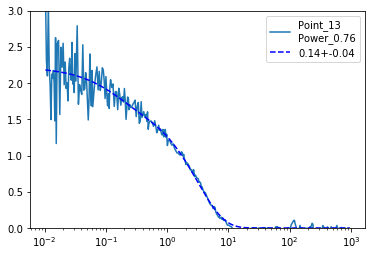

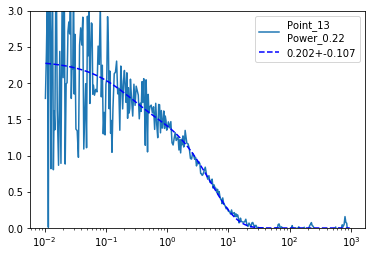

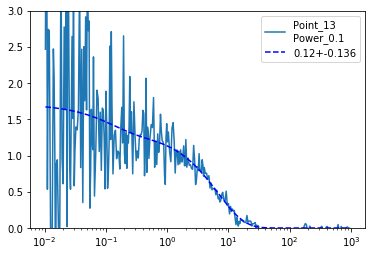

In [8]:
def fcs_power_fit_sm(foldername=folder_power_S106, input_potential=[75], pointnumbers=[13],
             power_list = [0.1, 0.22, 0.76],tmin=1e-2, tmax=1e3, string_id='20s'):
    def bi_exp(x, A1, A2, t1, t2):
        return((A1*exp(-x/t1)+A2*exp(-x/t2)))

    df_datnem_power_list, df_fcs_power_list = power_extract(foldername=foldername, laser_power_file=laser_power_file, string_id = string_id);
    FCS_list = df_fcs_power_list
    FCS_list = FCS_list[FCS_list['Potential'].isin(input_potential)]
    FCS_list = FCS_list[FCS_list['real_power'].isin(power_list)]
    fig=[]; df_fcs=[];
    for points in pointnumbers:
        #figure()
        df_fcs_specific = FCS_list[FCS_list['Point number'].isin([points])]
        df_fcs_specific.reset_index(drop=True, inplace=True)
        for j in range(len(df_fcs_specific)):#range(len(df_fcs_specific))
            f_fcs = df_fcs_specific['filepath[FCS]'][j]
            if os.path.isfile(f_fcs):
                fig= plt.figure()###########
                x=0
                power = df_fcs_specific['real_power'][j]
                df_fcs = pd.read_csv(f_fcs, index_col=False, names=None, skiprows=1,
                       header=None, sep='\s+');
                df_fcs = df_fcs[df_fcs[0]>=tmin];
                df_fcs = df_fcs[df_fcs[0]<=tmax];
                df_fcs.reset_index(drop=True, inplace=True);
                plot(df_fcs[0], df_fcs[1], label='Point_'+str(points)+'\n'+
                    'Power_'+str(power));
                bifit, pcov = curve_fit(bi_exp, df_fcs[0],df_fcs[1] , p0 = [10, 1, 10, 1], bounds=(0, np.inf))
                fit_times = bifit[2:];
                perr = np.sqrt(np.diag(pcov));
                err_times = perr[2:];
                plot(df_fcs[0], bi_exp(df_fcs[0], *bifit), 'b--', label = str(round(min(fit_times), 3))+
         '+-'+str(round(min(err_times), 3)));
            legend()
            xscale('log')
            ylim(0, 3);
#             savefig('point_'+str(points)+'_at'+str(power)+'_uW.jpg')
#             plt.close()
    return (fig, df_fcs)
fig_Cu, df_fcs_Cu = fcs_power_fit_sm(foldername=folder_power_S106, input_potential=[100], pointnumbers=[13],
             power_list = [0.1, 0.22, 0.76],tmin=1e-2, tmax=1e3, string_id='20s');

### Zn-Azurin power dependent

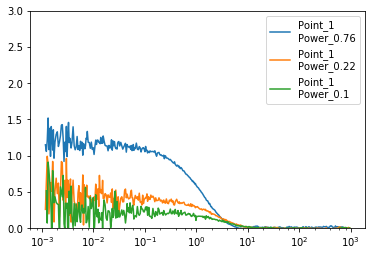

In [21]:
fig, df_fcs = fcs_power(foldername=folder_Zn_power_S107, input_potential=[0], pointnumbers=[1],
             power_list = [0.1, 0.22, 0.76],tmin=0.5e-3, tmax=1e3, string_id='20s')

### fcs comparision: Zn vs Cu-azurin

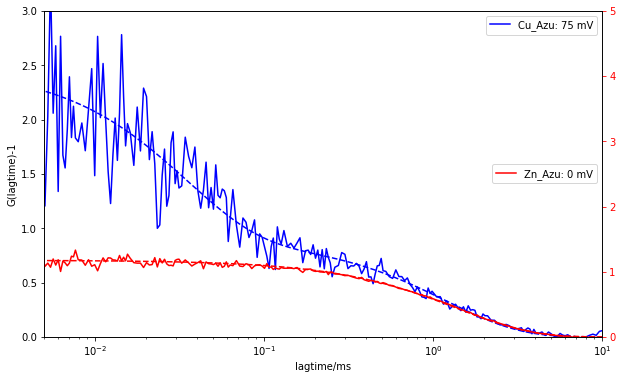

In [22]:
# script
fig_Cu, df_fcs_Cu = fcs_power(foldername=folder_power_S105, input_potential=[75], pointnumbers=[9],
             power_list = [0.76],tmin=0.5e-3, tmax=1e3, string_id='10s');
plt.close()
fig_Zn, df_fcs_Zn = fcs_power(foldername=folder_Zn_power_S107, input_potential=[0], pointnumbers=[1],
             power_list = [0.76],tmin=0.5e-3, tmax=1e3, string_id='20s')
plt.close()
def mono_exp(x, A1, t1):
    return A1*exp(-x/t1)
def bi_exp(x, A1, A2, t1, t2):
    return((A1*exp(-x/t1)+A2*exp(-x/t2)))
fig, ax = plt.subplots(figsize=(10, 6));
# Zn Azurin
ax.plot(df_fcs_Cu[0], df_fcs_Cu[1], 'b',label='Cu_Azu: 75 mV');
ax.set_xscale('log');
ax.set_ylim(0, 3)
# monofit, pcov_mono = curve_fit(mono_exp, df_fcs_Cu[0], df_fcs_Cu[1],
#                                p0 = [10, 1], bounds=(0, np.inf))
# ax.plot(df_fcs_Cu[0], mono_exp(df_fcs_Cu[0], *monofit), 'b--', label='');
bifit, pcov = curve_fit(bi_exp, df_fcs_Cu[0], df_fcs_Cu[1], p0 = [10, 1, 10, 1], bounds=(0, np.inf))
ax.plot(df_fcs_Cu[0], bi_exp(df_fcs_Cu[0], *bifit), 'b--', label='');

#CuAzurin
ax_r=ax.twinx()
ax_r.plot(df_fcs_Zn[0], df_fcs_Zn[1], 'r',label='Zn_Azu: 0 mV');
monofit, pcov_mono = curve_fit(mono_exp, df_fcs_Zn[0], df_fcs_Zn[1],
                               p0 = [10, 1], bounds=(0, np.inf))
ax_r.plot(df_fcs_Zn[0], mono_exp(df_fcs_Zn[0], *monofit), 'r--', label='');

ax_r.set_ylim(0, 5)
ax_r.set_xlim(0.5e-2, 1e1)
ax_r.tick_params('y', colors='r')

ax.legend(loc=1); ax_r.legend(loc=7)
ax.set_xlabel('lagtime/ms')
ax.set_ylabel('G(lagtime)-1')

### fcs_Average power

In [23]:
folder_power_S106 = r'/home/biswajit/Links/Link to AzurinSM-MS4/data/S106d17May17_CuAzu655_powerdependent';
folder_power_S105 = r'/home/biswajit/Links/Link to AzurinSM-MS4/data/S105d16May17_635_A3_CuAzu655_powerdependent';
folder_Zn_power_S107='/home/biswajit/Links/Link to AzurinSM-MS4/data/ZnAzurin_Data/S107d1May17_635_ZnAzu655_power';
laser_power_file='/home/biswajit/Links/Link to AzurinSM-MS4/data/power_measurement.xlsx'

def fcs_avg_power(foldername=folder_power_S105, input_potential=[75], pointnumbers=range(20),
             power_list = [0.1, 0.22, 0.76],tmin=0.5e-3, tmax=1e3, string_id='10s'):
    df_datnem_power_list, df_fcs_power_list = power_extract(foldername=foldername, laser_power_file=laser_power_file, string_id = string_id);
    FCS_list = df_fcs_power_list
    FCS_list = FCS_list[FCS_list['Potential'].isin(input_potential)]
    df_all_avg_corr = pd.DataFrame();
    
    for power in power_list:
        d_fcs_add_all = np.zeros(380);
        lagtime = [];
        num_fcs_file = 0;
        fCS_list_specific = FCS_list[FCS_list['real_power'].isin([power])];
        for fcs_file in fCS_list_specific['filepath[FCS]']:
            df_fcs = pd.read_csv(fcs_file, index_col=False, names=None, skiprows=1,
                                   header=None, sep='\s+');
            df_fcs = df_fcs[df_fcs[0]>=tmin];
            df_fcs = df_fcs[df_fcs[0]<=tmax];
            #print(len(df_fcs),len(df_fcs[1]), fcs_file[-15:]);
            if len(df_fcs)>380:
                df_fcs = df_fcs[:380]#!!!!!!CAREFUL!!!!!!!!!!!!!!!!!!!!
                df_fcs.reset_index(drop=True, inplace=True);
                d_fcs_add_all += df_fcs[1];
                num_fcs_file += 1;
                lagtime = df_fcs[0];
                df_all_avg_corr['time'] = lagtime;
        #print(len(d_fcs_add_all), len(lagtime))
        average_fcs = d_fcs_add_all/num_fcs_file
        power_col_name = str(power)+'_uW';
        df_all_avg_corr[power_col_name] = average_fcs;
    
    return (df_all_avg_corr)
df_all_avg_corr = fcs_avg_power();
df_all_avg_corr.to_csv('/home/biswajit/Links/Link to AzurinSM-MS4/data/all_avg_fcs__power_corr.csv',
                       sep='\t');

0.1
0.22
0.76


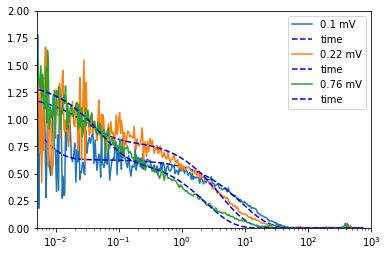

In [24]:
def tri_exp(x, A1, A2, A3, t1, t2, t3):
    return((A1*exp(-x/t1)+A2*exp(-x/t2)++A3*exp(-x/t3)))
def bi_exp(x, A1, A2, t1, t2):
    return((A1*exp(-x/t1)+A2*exp(-x/t2)))
df_all_avg_corr_Cu = pd.read_csv('/home/biswajit/Links/Link to AzurinSM-MS4/data/all_avg_fcs__power_corr.csv',
                             header=0,sep='\t')
df_all_avg_corr_Cu = df_all_avg_corr_Cu[1:]
col_values = list(df_all_avg_corr_Cu.columns.values);
col_values[1:];
pot_list=[];time_short_list = []; time_short_err_list=[]
for cols in col_values[2:]:
    power = float(cols[:-3])
    lagtime = df_all_avg_corr_Cu[col_values[1]];
    corr = df_all_avg_corr_Cu[cols]
    print(power)
    plot(lagtime, corr, label=str(power)+' mV');
    bifit, pcov = curve_fit(bi_exp, lagtime, corr, p0 = [10, 0.05, 10, 1], bounds=(0, np.inf))
#     fit_times = trifit[3:];
#     perr = np.sqrt(np.diag(pcov));
#     err_times = perr[3:];
    
#     pot_list.append(potential);
#     time_short_list.append(min(fit_times));
#     time_short_err_list.append(min(err_times))
    plot(lagtime, bi_exp(lagtime, *bifit), 'b--');

    xscale('log')
    xlim(0.5e-2, 1e3)
    ylim(0, 2)
legend()